<a href="https://colab.research.google.com/github/NiyazovIlia/neural_networks/blob/lesson-8/neural_networks_lesson_8_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Flatten
import matplotlib.pyplot as plt
from google.colab import files
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Conv2D, MaxPooling2D
from tensorflow.python.keras.layers import Activation, Dropout, Flatten, Dense

In [2]:
train, _ = tfds.load('cats_vs_dogs', split=['train[:80%]'], with_info=True, as_supervised=True)
test, _ = tfds.load('cats_vs_dogs', split=['train[80%:]'], with_info=True, as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/cats_vs_dogs/4.0.0.incompleteZWTF8Z/cats_vs_dogs-train.tfrecord


  0%|          | 0/23262 [00:00<?, ? examples/s]

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.0. Subsequent calls will reuse this data.


In [3]:
SIZE = 224
input_shape = (SIZE, SIZE, 3)
def resize_image(img, label):
  img = tf.cast(img, tf.float32)
  img = tf.image.resize(img, (SIZE, SIZE))
  img = img / 255.0
  return img, label

In [4]:
train_resized = train[0].map(resize_image)
train_batches = train_resized.shuffle(1000).batch(16)

test_resized = test[0].map(resize_image)
test_batches = test_resized.shuffle(1000).batch(16)

In [5]:
model = tf.keras.Sequential()

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [6]:
model.fit(train_batches, batch_size=16, epochs=5, validation_data=test_batches)

Epoch 1/5
1164/1164 [==============================] - 1291s 1s/step - loss: 0.6721 - accuracy: 0.6221 - val_loss: 0.6096 - val_accuracy: 0.6851
Epoch 2/5
1164/1164 [==============================] - 1279s 1s/step - loss: 0.5450 - accuracy: 0.7291 - val_loss: 0.5195 - val_accuracy: 0.7580
Epoch 3/5
1164/1164 [==============================] - 1277s 1s/step - loss: 0.4173 - accuracy: 0.8092 - val_loss: 0.5035 - val_accuracy: 0.7631
Epoch 4/5
1164/1164 [==============================] - 1272s 1s/step - loss: 0.3063 - accuracy: 0.8668 - val_loss: 0.5930 - val_accuracy: 0.7603
Epoch 5/5
1164/1164 [==============================] - 1266s 1s/step - loss: 0.2144 - accuracy: 0.9119 - val_loss: 0.6738 - val_accuracy: 0.7573


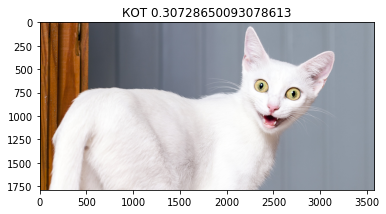

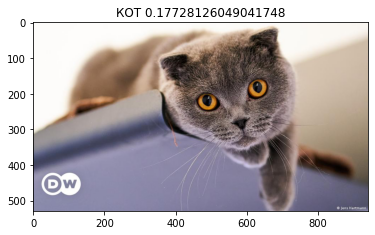

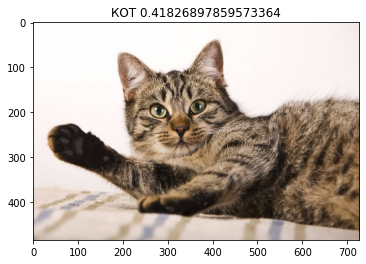

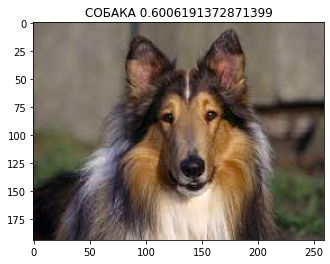

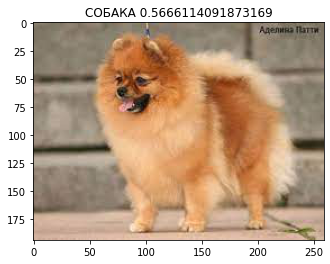

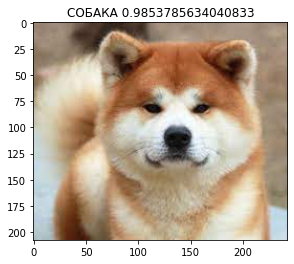

In [8]:
for i in range(6):
  img = load_img(f'{i+1}.jpg')
  img_array = img_to_array(img)
  img_resized, _ = resize_image(img_array, _)
  img_expended = np.expand_dims(img_resized, axis=0)
  prediction = model.predict(img_expended)[0][0]
  pred_label = 'КОТ' if prediction < 0.5 else 'СОБАКА'
  plt.figure()
  plt.imshow(img)
  plt.title(f'{pred_label} {prediction}')